### Objectives of this notebook:
- display output from Training Image Modelling
- perform analysis on output. eg. feature importance and Training Image selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [41]:
import numpy as np
import pandas as pd
import plotly.io as pio
import sys
import random 
import datetime
import pathlib

sys.path.append("../")
from training_images.TI_selection import TI_selection
pio.renderers.default = "browser"


### Import data

In [159]:
dataset = "2020_12_14_12_25" #2020_11_20_16_03 2020_11_28_12_34

TI_data = TI_selection(dataset = dataset, n_shedules = 2,TI_name = "TI_flank")

In [160]:
pio.renderers.default = "browser"
TI_data.plot_TI_performance()

Plotting Training Image 264


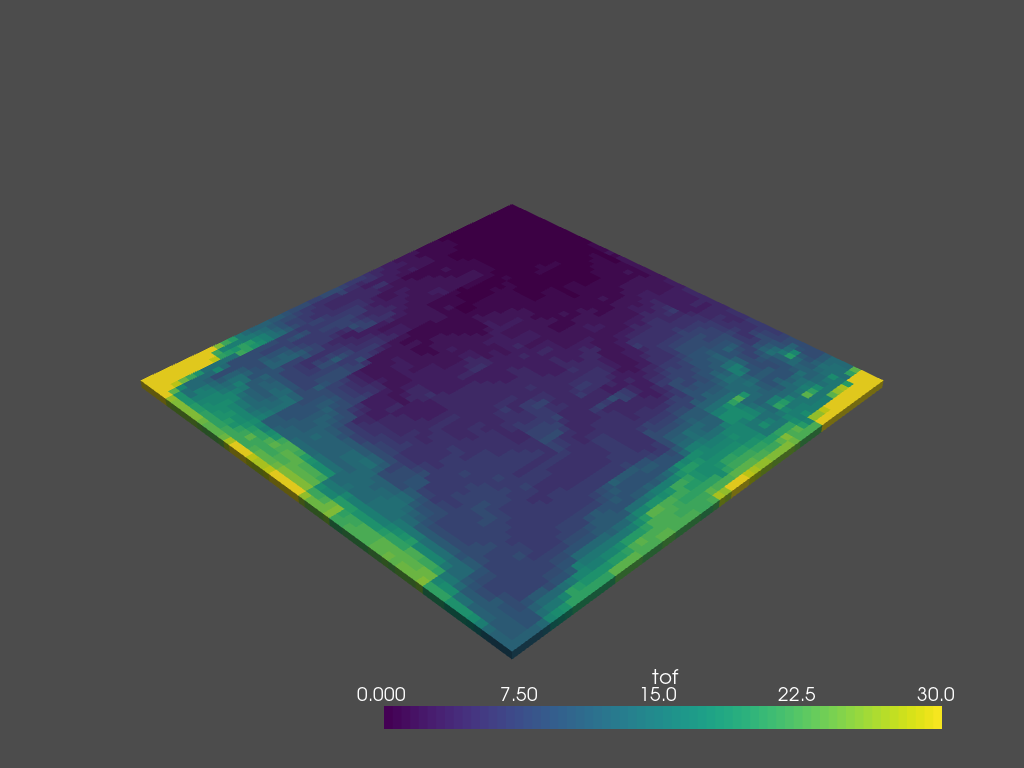

In [161]:
TI_data.plot_best_model(TI_id = 515, random_TI = True, property ="tof",n_bins = 30,min_tof_bin = 0,max_tof_bin = 30,shedule_no = 0)

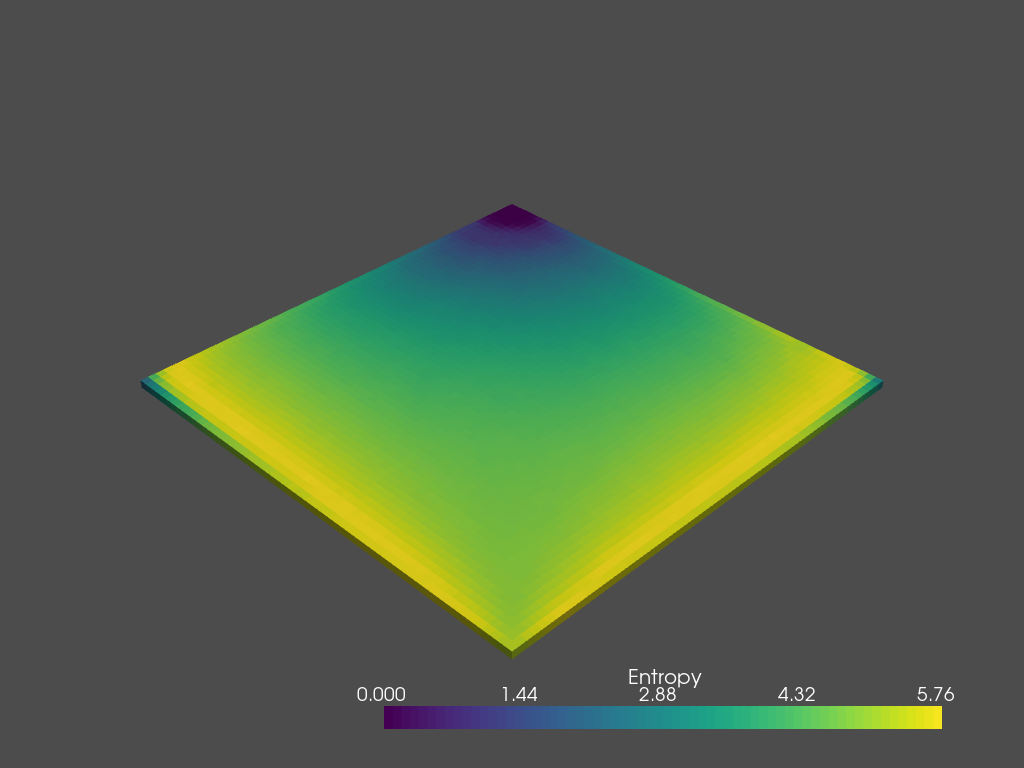

In [101]:
TI_data.plot_tof_entropy(max_tof_bin = 60,n_bins = 60,shedule_no = 0)

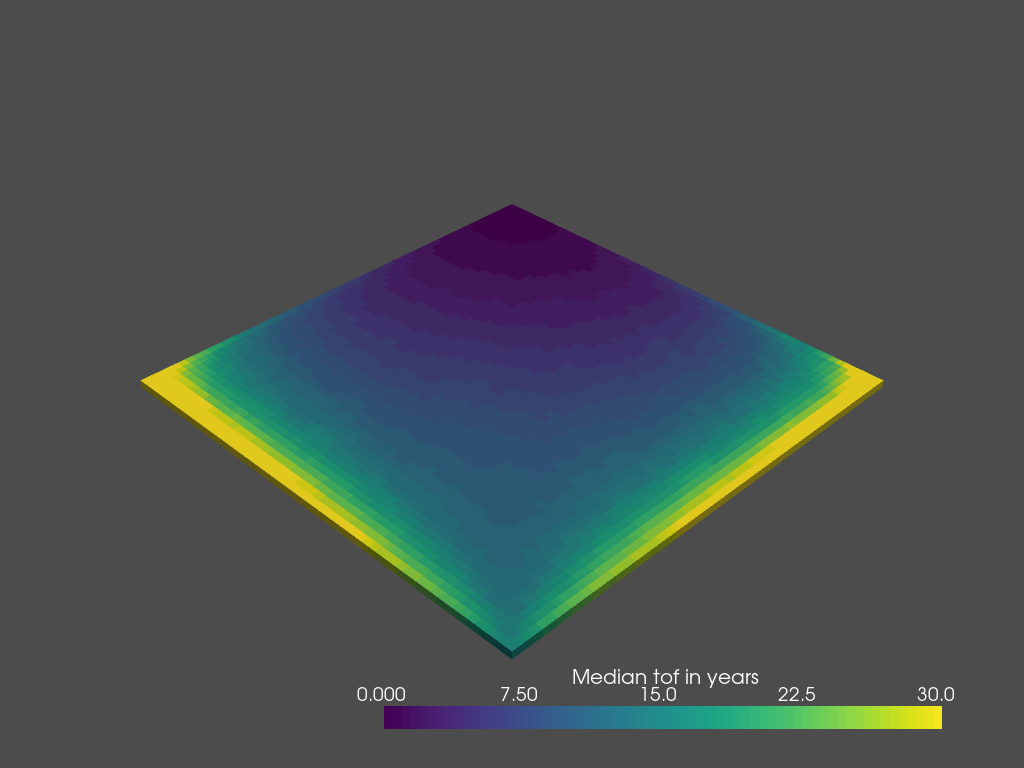

In [102]:
TI_data.plot_tof_all_models(n_bins = 30,shedule_no = 0,max_tof_bin = 30)

In [163]:
pio.renderers.default = "notebook"

TI_data.clustering_tof_or_TI_props(n_neighbors = 20,min_dist = 0,n_components = 30, min_cluster_size = 15,
                           min_samples = 1,allow_single_cluster = False,cluster_parameter = "tof",min_tof_bin = 0,max_tof_bin = 20, n_bins = 20)



In [164]:
TI_data.cluster_TI_selection(n_TIs= 20)

In [165]:
TI_data.save_best_clustered_TIs()

Path ..\training_images\..\..\Output\training_images\TI_flank\2020_12_14_12_25\


### Feature importance - model explainability

In [166]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [172]:
TI_data.df_TI_props.drop("cluster_tof",axis = 1)

TI_no      P32  P32_random  P32_area_specific  n_fracsets_random  \
0        0  0.04937     0.02814            0.02123                2.0   
1        1  0.08823     0.03441            0.05382                1.0   
2        2  0.06182     0.02349            0.03833                4.0   
3        3  0.07499     0.02625            0.04874                4.0   
4        4  0.05938     0.00653            0.05285                2.0   
..     ...      ...         ...                ...                ...   
595    595  0.06209     0.01801            0.04408                4.0   
596    596  0.02674     0.00053            0.02621                4.0   
597    597  0.09785     0.03229            0.06556                4.0   
598    598  0.01573     0.00928            0.00645                2.0   
599    599  0.08232     0.05022            0.03210                3.0   

     n_fracsets_area_specific  seed_random_0  P32_random_0  \
0                         3.0        87718.7      0.014070   
1                         2.0        88640.8      0.034410   
2                         2.0        60768.5      0.005873   
3                         1.0        55901.4      0.006562   
4                         3.0        12450.2      0.003265   
..                        ...            ...           ...   
595                       2.0        92647.3      0.004503   
596                       2.0         7931.7      0.000132   
597                       3.0        13683.0      0.008072   
598                       3.0        30908.3      0.004640   
599                       2.0        97144.0      0.016740   

     frac_length_shape_random_0  frac_length_scale_random_0  ...  \
0                          2.36                        8.59  ...   
1                          2.25                       14.23  ...   
2                          2.15                        5.84  ...   
3                          2.13                       21.75  ...   
4                          2.40                        5.02  ...   
..                          ...                         ...  ...   
595                        2.17                        7.83  ...   
596                        2.19                       11.79  ...   
597                        2.31                       23.45  ...   
598                        2.21                        6.42  ...   
599                        2.49                       19.79  ...   

     frac_orient_concentration_area_specific_3  mean_permx  mean_permy  \
0                                        42.77     179.998   117.69000   
1                                        13.42     216.630    93.95550   
2                                         6.95     279.487    50.24960   
3                                        14.76     216.252    43.78150   
4                                        40.94     237.931    68.07690   
..                                         ...         ...         ...   
595                                      46.95     185.929    17.49270   
596                                       4.96     289.732   139.70800   
597                                      49.41     145.685    27.08490   
598                                       7.16     224.713    80.74170   
599                                       7.26     207.484     9.79303   

     mean_permz  frac_cell_fraction      LC_0      LC_1  cluster_tof_prob  \
0       303.249            0.587500  0.252649  0.236919          1.000000   
1       143.244            0.245000  0.181825  0.171868          1.000000   
2       317.580            0.600000  0.161332  0.221615          1.000000   
3       261.466            0.362222  0.244689  0.238643          0.700504   
4       399.359            0.798333  0.250733  0.289756          1.000000   
..          ...                 ...       ...       ...               ...   
595     262.011            0.539722  0.186969  0.220630          1.000000   
596     148.331            0.380278  0.204612  0.217419      

In [192]:
X_train = TI_data.df_TI_props.drop(["TI_no","cluster_tof","LC_0","LC_1","cluster_tof_prob","cluster_tof_x","cluster_tof_y","frac_cell_fraction"],axis = 1)
Y_train = TI_data.df_TI_props["LC_1"]

In [193]:
# load JS visualization code to notebook
shap.initjs()

In [194]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

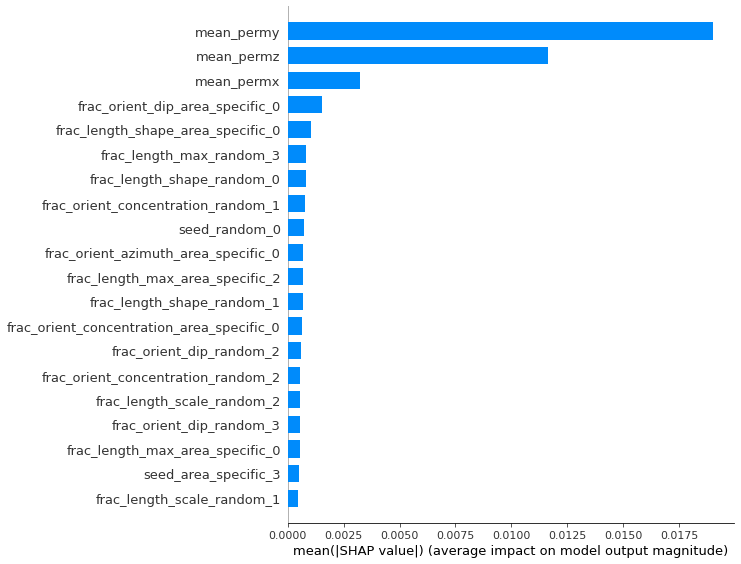

In [195]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [196]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [197]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

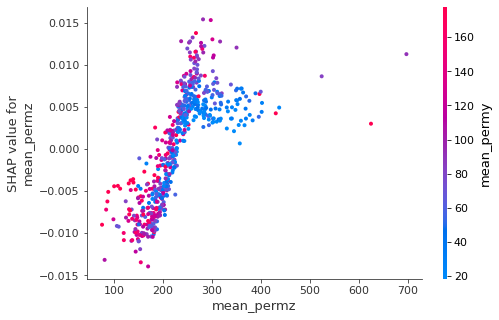

In [185]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("mean_permz", shap_values, X_train)

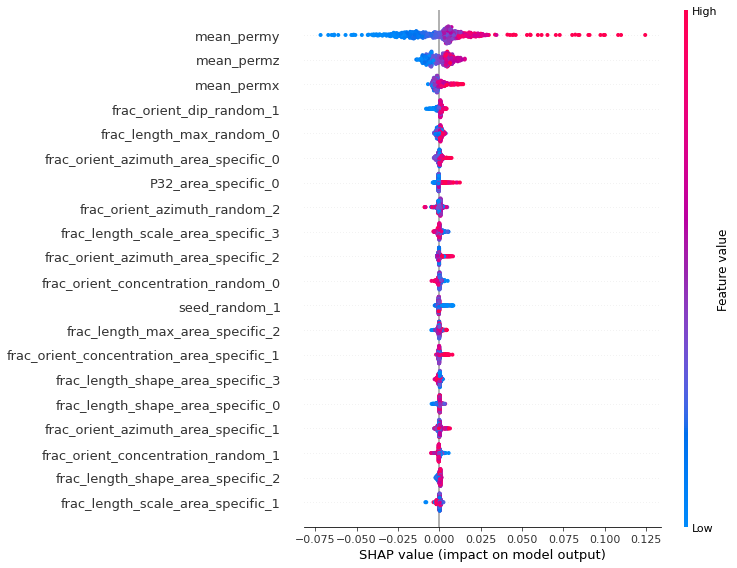

In [184]:
shap.summary_plot(shap_values, X_train)
